#House Price Prediction
Building a predictive Linear Regression model using sklearn

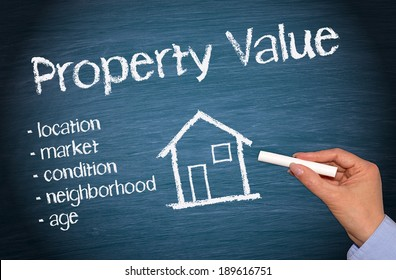

The aim of this notebook is to predict prices per unit of housing area by building linear regression model. The dataset used in this project is called “Real Estate” and can be obtained [here](https://https://www.kaggle.com/quantbruce/real-estate-price-prediction). The following are the given variables:

*   Transaction date
*   House age
*   Distance to the nearest MRT station
*   Number of convenience stores
*   Latitude
*   Longitude






We can now import some necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import pickle
from sklearn import preprocessing
from sklearn import preprocessing
import seaborn as sns
from keras.models import sequential
from keras.layers import Dense
from keras import metrics
from keras.wrappers.scikit_learn import KerasRegressor

#Loading data
We can have a quick look at the data by viewing the first 10 rows.

In [3]:
data = pd.read_csv('/content/Real estate.csv')
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


For each row, we have the price of a house with its corresponding features and the date on when the transaction took place.

#Exploratory Data Analysis

Before building a machine learning model, it is important to conduct an exploratory analysis of the data. This will help us to see the relationship between the features and the target variable. We begin by checking the shape of the dataset and displaying its information.

In [4]:
data.shape

(414, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

This dataset has 414 rows and 8 columns. There are no missing values in the data

In [7]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


We can notice the variations in the data from the standard deviation in the table above, therefore, we rescale the data to mean 0 and variance 1.

In [8]:
#standaring the data
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

In [9]:
#Renaming columns
data.columns = ['No','Date','age','dist_to_nearest_MRT_station','number_of_Convenience_stores','latitude','longitude','price']

(array([ 28.,  95., 111., 115.,  52.,   9.,   3.,   0.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

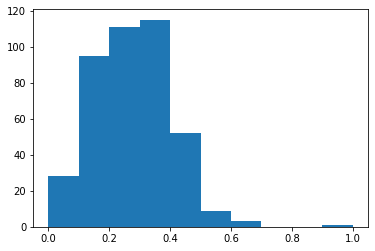

In [10]:
plt.hist(data['price'])

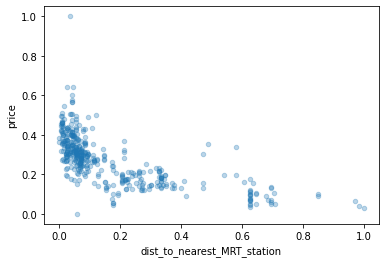

In [11]:
# Plotting the relationship between an input column and the target
data.plot(x='dist_to_nearest_MRT_station', y='price', kind='scatter', alpha=0.3)
plt.show()

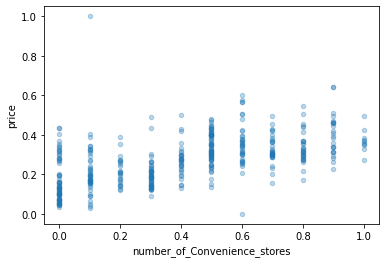

In [12]:
# Plotting the relationship between an input column and the target
data.plot(x='number_of_Convenience_stores', y='price', kind='scatter', alpha=0.3)
plt.show()

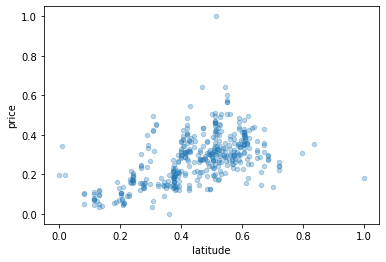

In [13]:
# Plotting the relationship between an input column and the target
data.plot(x='latitude', y='price', kind='scatter', alpha=0.3)
plt.show()

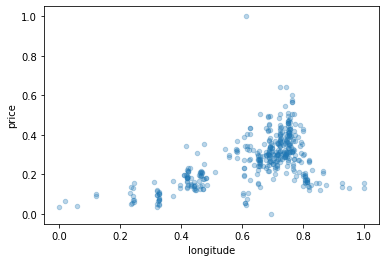

In [14]:
# Plotting the relationship between an input column and the target
data.plot(x='longitude', y='price', kind='scatter', alpha=0.3)
plt.show()

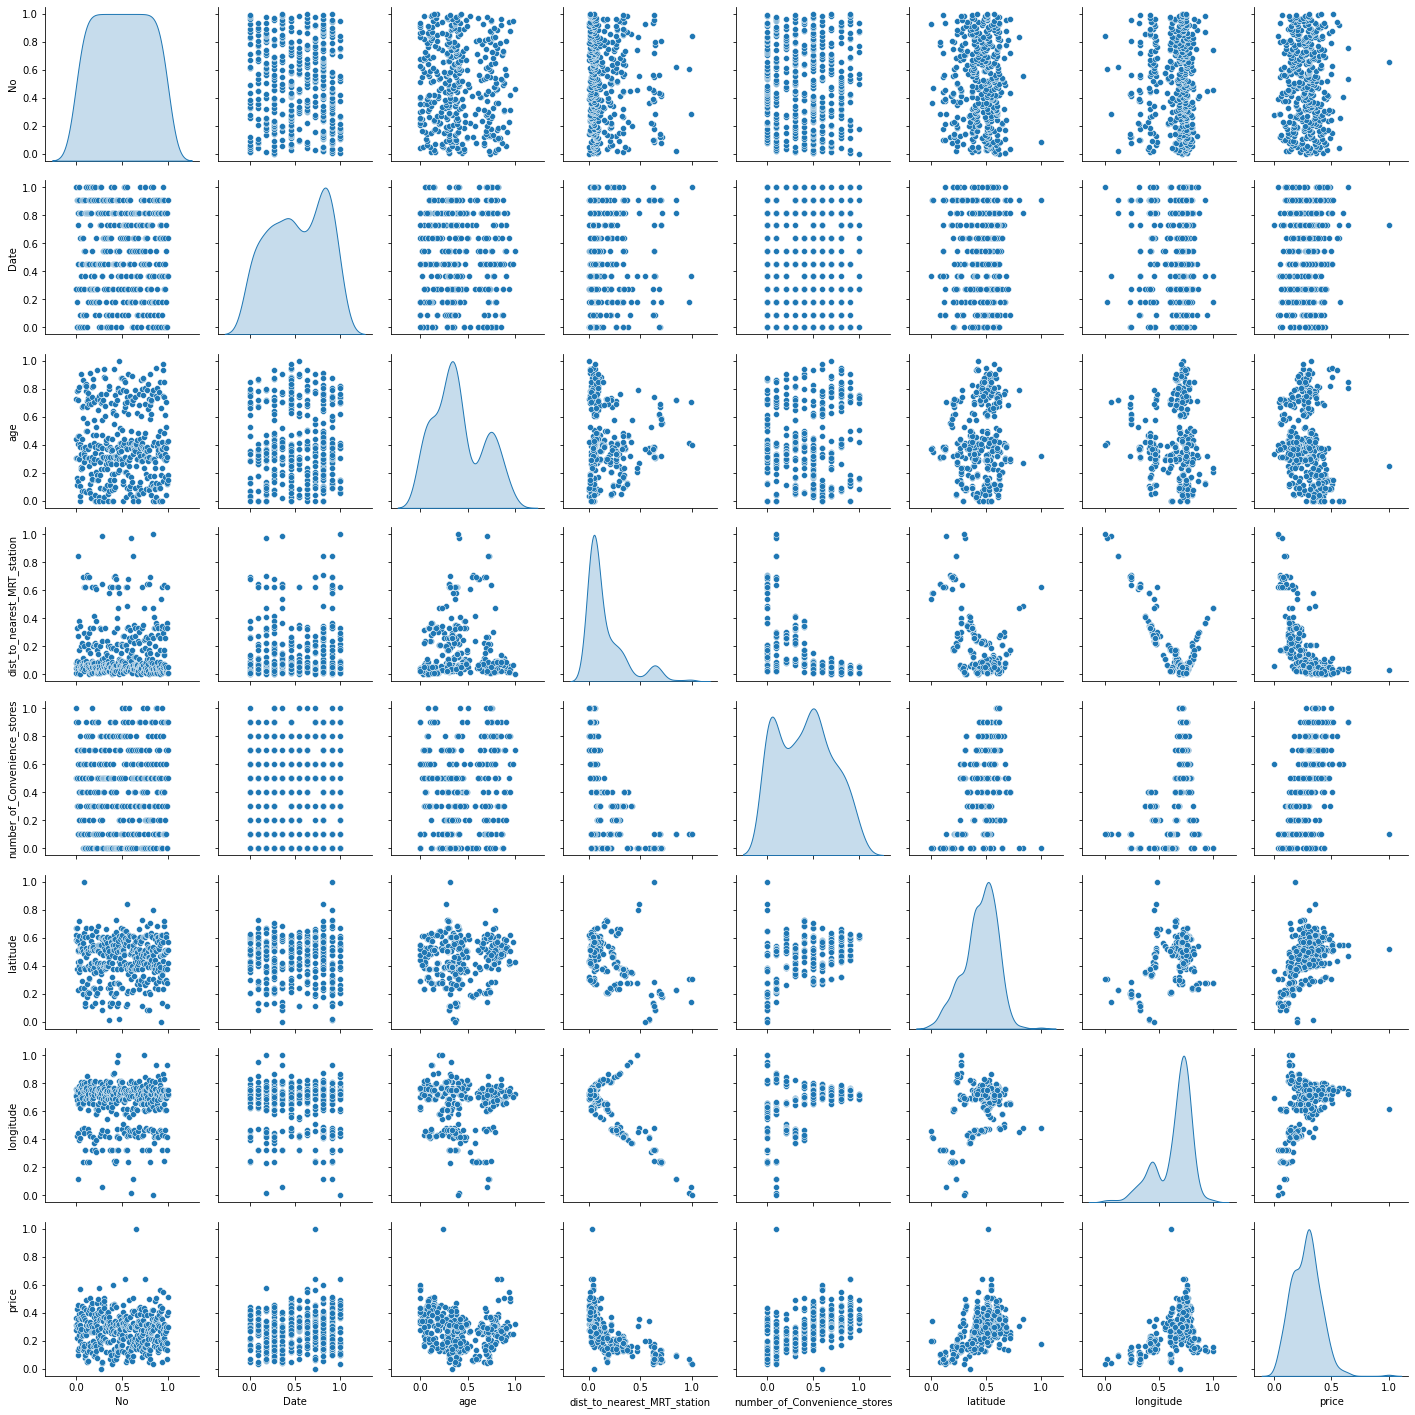

In [15]:
sns.pairplot(data,diag_kind='kde')

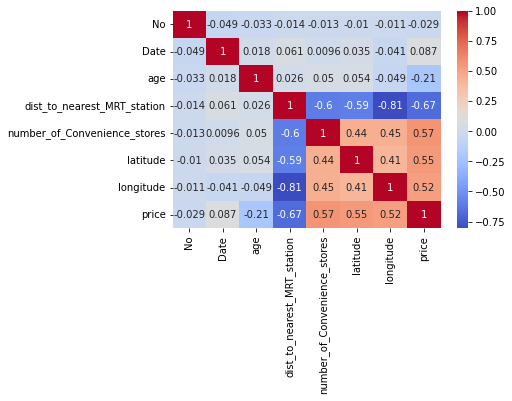

In [16]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

#Data Preparation

In [17]:
X = data.drop(columns=['No','Date','price'])
Y = data['price']

split the dataset

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state = 101)

In [19]:
len(X_train)

310

##Building the model

In [20]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_

array([-0.11542002, -0.22705247,  0.11265515,  0.19456212,  0.03212545])

In [22]:
model.score(X,Y)

0.5683889538005612

In [23]:
predicted = model.predict(X_test)

In [24]:
expected = Y_test

In [25]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(expected,predicted)
MSE=metrics.mean_squared_error(expected,predicted)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE','MSE','RMSE'],columns=['metrics'])

,metrics
MAE,0.047300
MSE,0.003658
RMSE,0.060478


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


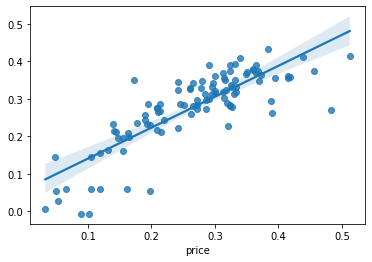

In [26]:
#create scatterplot with regression line and confidence interval lines
sns.regplot(expected, predicted)

##Example

In [41]:
input=[[14,45,4,58,20]]

In [28]:
model.predict(input)

array([32.63526784])

#Saving the model

In [29]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))

#Loading model

In [30]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.6421017534556792


In [31]:
!pip install streamlit

In [32]:
!pip install pyngrok

In [48]:
!ngrok authtoken 1lSl5RMkADZ2p4HYnMk3ZQcqzNw_5KvvAFxRwEPJz9UcboW7R

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [49]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [50]:
from pyngrok import ngrok 
url = ngrok.connect(port = 8501)
url

<NgrokTunnel: "http://56ca-34-121-31-199.ngrok.io" -> "http://localhost:80">

In [51]:
!streamlit run --server.port 80 app.py >/dev/null

http://56ca-34-121-31-199.ngrok.io/
